### Domain Background:

According to the Centers for Disease Control and Prevention (CDC) breast cancer is the most common type of cancer for women regardless of race and ethnicity (CDC, 2016). Around 220,000 women are diagnosed with breast cancer each year in the United States (CDC, 2016). Although we may not be aware of all the factors contributing in developing breast cancer, certain attributes such as family history, age, obesity, alcohol and tobacco use have been identified from research studies on this topic (DeSantis, Ma, Bryan, & Jemal, 2014). 


#### Problem Statement

This project focuses in investigating the probability of predicting the type of breast cancer (malignant or benign) from the given characteristics of breast mass computed from digitized images.  This project will examine the data available and attempt to predict the possibility that a breast cancer diagnosis is malignant or benign based on the attributes collected from the breast mass. Various classifiers can be used to solve this problem, k-nearest, logistic regression, SVM, QDA, and others. A comparison of classifiers may be needed. 


In [1]:
#The libraries used for this project are:
#First import all the libraries needed

import numpy as np #for linear algebra
import pandas as pd #for chopping, processing
import csv #for opening csv files
%matplotlib inline 
import matplotlib.pyplot as plt #for plotting the graphs
from sklearn.linear_model import LogisticRegression #for logistic regression
from sklearn.pipeline import Pipeline #to assemble steps for cross validation
from sklearn.preprocessing import PolynomialFeatures #for all the polynomial features
from sklearn import svm #for Support Vector Machines
from sklearn.neighbors import NearestNeighbors #for nearest neighbor classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #for decision tree classifier
from sklearn.naive_bayes import GaussianNB  #for naive bayes classifier
from scipy import stats #for statistical info
from sklearn.model_selection import train_test_split # to split the data in train and test
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import KFold # for cross validation
from sklearn.grid_search import GridSearchCV  # for tuning parameters
from sklearn.neighbors import KNeighborsClassifier  #for k-neighbor classifier
from sklearn import metrics  # for checking the accuracy 
from time import time
# And all the different types of classifiers that will be used
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier


//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
//anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


###### Dataset and Inputs

The characteristics of the cell nuclei have been captured in the images and a classification methods which uses linear programming to construct a decision line. The dataset is published by Kaggle and taken from the University of California Irvine (UCI) machine learning repository.  The data is taken from the Breast Cancer Wisconsin Center. It includes ten (10) attributes taken from each cell nucleus as well as ID and the diagnosis (M=malignant, B=benign).  The dataset has 570 cases.  


In [2]:
#load data
data = pd.read_csv("data.csv")

In [3]:
#to know the number of cases and the number of variables
data.shape

(569, 32)

In [4]:
#Description of the dataset

#how many cases are included in the dataset
length = len(data)
#how many features are in the dataset
features = data.shape[1]-1

# Number of malignant cases
malignant = len(data[data['diagnosis']=='M'])

#Number of benign cases
benign = len(data[data['diagnosis']=='B'])

#Rate of malignant tumors over all cases
rate = (float(malignant)/(length))*100

print "There are "+ str(len(data))+" cases in this dataset"
print "There are {}".format(features)+" features in this dataset"
print "There are {}".format(malignant)+" cases diagnosed as malignant tumor"
print "There are {}".format(benign)+" cases diagnosed as benign tumor"
print "The percentage of malignant cases is: {:.4f}%".format(rate)

There are 569 cases in this dataset
There are 31 features in this dataset
There are 212 cases diagnosed as malignant tumor
There are 357 cases diagnosed as benign tumor
The percentage of malignant cases is: 37.2583%


###### Descriptive Information of the Data

The dataset includes 569 cases with 31 features for each case.  From these total cases, 212 are malignant tumor and 357 are benign.  The percentage rate of malignant cases is 37%. 

In [5]:
#drop ID because we do not need the ID number as shown above
data.drop('id',axis=1,inplace=True)
#check that dropped
data.head(1)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


In [6]:
#explore further the dataset
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [7]:
#explore some of the attribute for best understanding
#radius mean is the mean of distances from center to points on the perimeter of breast mass
#so let's look at maximum, minimum, average, and standard deviation of radius mean
min_radius = min(data['radius_mean'])
max_radius = max(data['radius_mean'])
average_radius = np.mean(data['radius_mean'])
sd_radius = np.std(data['radius_mean'])

print "Minimum of radius mean is: {:,.2f} ".format(min_radius)
print "Maximum of radius mean is: {:,.2f} ".format(max_radius)
print "Average of radius mean is: {:,.2f} ".format(average_radius)+"with a standard deviation of {:,.2f}".format(sd_radius)


Minimum of radius mean is: 6.98 
Maximum of radius mean is: 28.11 
Average of radius mean is: 14.13 with a standard deviation of 3.52


In [8]:
#texture mean is the standard deviation of gray scale value
#so let's look at maximum, minimum, average, and standard deviation of texture mean
min_texture = min(data['texture_mean'])
max_texture = max(data['texture_mean'])
average_texture = np.mean(data['texture_mean'])
sd_texture = np.std(data['texture_mean'])

print "Minimum of texture mean is: {:,.2f} ".format(min_texture)
print "Maximum of texture mean is: {:,.2f} ".format(max_texture)
print "Average of texture mean is: {:,.2f} ".format(average_texture)+"with a standard deviation of {:,.2f}".format(sd_texture)


Minimum of texture mean is: 9.71 
Maximum of texture mean is: 39.28 
Average of texture mean is: 19.29 with a standard deviation of 4.30


In [9]:
#to see how distribution is in regard to the diagnosis, we need to first split
#the dataset into two groups
malignant = data[data['diagnosis'] =='M']
benign = data[data['diagnosis'] =='B']
#also create a list of the first ten features
features = list(data.columns[0:10])

In [13]:
#just to check that this works
malignant[features].head(2)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812


##### Solution Statement

Now, that a clearer understanding exists on the dataset, I would create a test and training set. Then, I will create a classification/predicting model such as logistic regression, k-nearest, random forest, QDA, and SVM to see which has the highest accuracy. Once the model with highest accuracy appears, I can draw conclusions and interpretations. It may be needed to fine tune the model for best accuracy as well.  


In [16]:
# Extract feature columns where everything but the diagnosis is included.
# I am separating all the features that are helpful in determining the diagnosis
features = list(data.columns[1:30])
print features

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst']


In [17]:
#Our target is predicting the diagnosis in benign or malignant, so we need
#to extract this one as the dependent variable - the variable we will predict
target = data.columns[0:1]
print target

Index([u'diagnosis'], dtype='object')


In [18]:
#Now we need to separate the data into feature data and target data
X = data[features] #our features that we will use to predict Y
Y = data[target] #our dependent variable, the one we are trying to predict from X

In [19]:
# X should have 29 variables and 569 cases
X.shape

(569, 29)

In [20]:
# Y should have 1 variable - just the diagnosis and 569 cases
Y.shape

(569, 1)

In [21]:
# Show the feature information by printing the first row
# Show the traget information by also printing the first row
print "\nFeature values:"
print X.head(1)
print "\nTarget values:"
print Y.head(1)


Feature values:
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38           122.8     1001.0           0.1184   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0            0.2776          0.3001               0.1471         0.2419   

   fractal_dimension_mean       ...        fractal_dimension_se  radius_worst  \
0                 0.07871       ...                    0.006193         25.38   

   texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0          17.33            184.6      2019.0            0.1622   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  
0             0.6656           0.7119                0.2654          0.4601  

[1 rows x 29 columns]

Target values:
  diagnosis
0         M


In [22]:
df=pd.DataFrame(data)

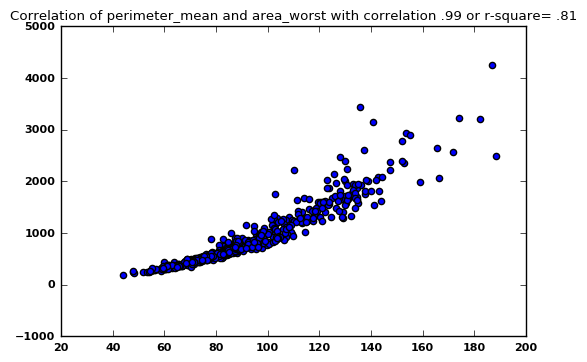

In [23]:
#Research shows that any variables that are highly correlated
#should be removed from further analysis. But, PCA takes care of multicollinearity, so maybe 
#I identify them which ones there are and let PCA to do its job.  
#Just in case let's see how two highly correlated variables look like
#using prettyplots
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1)
for i in range(1):
    x=df['perimeter_mean']
    y=df['area_worst']
    ax.scatter(x,y, label=str(i))
#ax.legend()
ax.set_title('Correlation of perimeter_mean and area_worst with correlation .99 or r-square= .81')
fig.savefig('scatter.png')

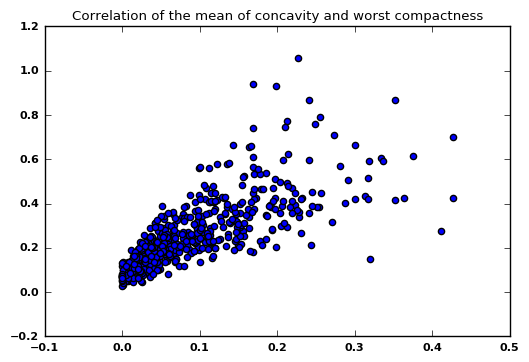

In [24]:
#Let's visualize another set of variables that are not correlated as highly as the first ones
#These have a correlation coefficient of .75 which means an r-squared score of approximately .49
fig, ax = plt.subplots(1)
for i in range(1):
    x=df['concavity_mean']
    y=df['compactness_worst']
    ax.scatter(x,y, label=str(i))
#ax.legend()
ax.set_title('Correlation of the mean of concavity and worst compactness')
fig.savefig('scatter.png')

In [25]:
def preprocess_features(X):
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all M/B malignant/benign values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['M', 'B'], [1, 0])
 
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X = preprocess_features(X)
Y = preprocess_features(Y)
print "Processed feature columns ({} total features):\n{}".format(len(X.columns), list(X.columns))
print "Target columns ({} total features):\n{}".format(len(Y.columns), list(Y.columns))

Processed feature columns (29 total features):
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst']
Target columns (1 total features):
['diagnosis']


In [26]:
# Set the number of training points
nr_train = 300
# Set the number of testing points
nr_test = X.shape[0] - nr_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=nr_test, random_state=40)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 269 samples.


##### Benchmark Model

The highest accuracy the better the model will be predicting whether a person diagnosed with breast cancer has a benign or malignant tumor. To form a solid idea on the benchmark models, I perused the research literature on the same topic – predicting the type of cancer from computer-generated images.  One study that uses mammogram images of 200 cases and utilizes both k-nearest and SVM methods to classify the type of cancer achieved specificity of 92.10% with standard deviation of 2.75 and accuracy levels of 92.16% with standard deviation of 3.60 (Zhang, Wang & Yang, 2016).  Another study that suggests the use of magnetic resonance imaging (MRI) instead of ultrasound to detect the type of breast cancer among diagnosed women, utilized a sample of 110 lymph nodes from pre-operative MRIs. They achieved an accuracy level of 79.1%, and was considered much superior to the ultrasound (Chung, Hyun, Kim, Gweon, Kim, Ryu, & Son, 2014).  A third study that also compares the accuracy levels of ultrasounds and mammography, found that mammography images are a better predictor than ultrasounds at accuracy levels of 90.7% (Tozaki & Fukuma, 2011).  Judging from these three different studies on this similar topic, I calculated an average of accuracy levels of 87.32%.  Therefore, my benchmark levels will be 87% or higher.  


In [27]:
from sklearn.metrics import f1_score
def train_classifier(clf, X_train, Y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, Y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    Y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, Y_pred, pos_label=1)


def train_predict(clf, X_train, Y_train, X_test, Y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, Y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, Y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, Y_test))

##### Evaluation metric

F1 score is a measure of accuracy or the ratio of the data that was accurately predicted. The closer the F-score is to 1 the best the prediction is and the closer to 0 it is, the worse the prediction. F-score considers the true positives and the true negatives, and is best used when comparing various classifiers as I am proposing to do in this dataset.  From the literature, I reached the conclusion that F-score is the best evaluation metric to be used for this type of classification problem.  The formula for the F1 score from the sklearn documentation is F1 = 2* (precision * recall) / (precision + recall). 


In [28]:
clf_A = KNeighborsClassifier()
clf_B = DecisionTreeClassifier(random_state=0)
clf_C = SVC()
clf_D = GaussianNB()
clf_E = RandomForestClassifier(n_estimators=10)
clf_G = AdaBoostClassifier()
clf_H = QuadraticDiscriminantAnalysis()
clf_I = MLPClassifier(alpha=1)


In [29]:
X_train_100 = X_train[:100]
Y_train_100 = Y_train[:100]

X_train_200 = X_train[:200]
Y_train_200 = Y_train[:200]

X_train_300 = X_train[:300]
Y_train_300 = Y_train[:300]


In [30]:
for clf in [clf_A, clf_B, clf_C, clf_D, clf_E, clf_G, clf_H, clf_I]:
    for size in [100, 200, 300]:
        train_predict(clf, X_train[:size], Y_train[:size], X_test, Y_test)
        print '/n'

Training a KNeighborsClassifier using a training set size of 100. . .
Trained model in 0.0035 seconds
Made predictions in 0.0019 seconds.
F1 score for training set: 0.8857.
Made predictions in 0.0018 seconds.
F1 score for test set: 0.8588.
/n
Training a KNeighborsClassifier using a training set size of 200. . .
Trained model in 0.0005 seconds
Made predictions in 0.0019 seconds.
F1 score for training set: 0.9200.
Made predictions in 0.0032 seconds.
F1 score for test set: 0.8927.
/n
Training a KNeighborsClassifier using a training set size of 300. . .
Trained model in 0.0006 seconds
Made predictions in 0.0026 seconds.
F1 score for training set: 0.9264.
Made predictions in 0.0023 seconds.
F1 score for test set: 0.9081.
/n
Training a DecisionTreeClassifier using a training set size of 100. . .
Trained model in 0.0030 seconds
Made predictions in 0.0004 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0001 seconds.
F1 score for test set: 0.9153.
/n
Training a DecisionTreeCla

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Trained model in 0.0383 seconds
Made predictions in 0.0062 seconds.
F1 score for training set: 0.9871.
Made predictions in 0.0065 seconds.
F1 score for test set: 0.9231.
/n
Training a AdaBoostClassifier using a training set size of 100. . .
Trained model in 0.1505 seconds
Made predictions in 0.0042 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0052 seconds.
F1 score for test set: 0.9457.
/n
Training a AdaBoostClassifier using a training set size of 200. . .
Trained model in 0.1612 seconds
Made predictions in 0.0052 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0053 seconds.
F1 score for test set: 0.9399.
/n
Training a AdaBoostClassifier using a training set size of 300. . .
Trained model in 0.1702 seconds
Made predictions in 0.0054 seconds.
F1 score for training set: 1.0000.
Made predictions in 0.0053 seconds.
F1 score for test set: 0.9451.
/n
Training a QuadraticDiscriminantAnalysis using a training set size of 100. . .
Trained model in 0.0085 s

//anaconda/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:904: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###### Conclusion

QDA seems to produce the best possible results for predicting the type of breast cancer from these images of diagnosed cases.  

###### REFERENCES:

DeSantis, C., Ma, J., Bryan, L. and Jemal, A. (2014), Breast cancer statistics, 2013. CA A Cancer Journal for Clinicians, 64: 52–62. doi:10.3322/caac.21203

U.S. Cancer Statistics Working Group. United States Cancer Statistics: 1999–2013 Incidence and Mortality Web-based Report. Atlanta (GA): Department of Health and Human Services, Centers for Disease Control and Prevention, and National Cancer Institute; 2016. Available at: http://www.cdc.gov/uscs.

Zhang, Wang, & Yang (2016). Computer aided diagnosis of abnormal breast in mammogram images by weighted type fractional Fourier transform, Advances in Mechanical Engineering, 8(2), 1-11. 
Chung, Youk, Kim, Gweon, Kim, Ryu, & Son (2014). Role of diffusion-weighted MRI: predicting axillary lymph node metastases in breast cancer, Acta Radiologica, 55(8), 909 - 916
Tozaki & Fukuma (2011). Does power Doppler ultrasonography improve the BI-RADS category assessment and diagnostic accuracy of solid breast lesions? Acta Radiologica, 52 (7), 706 - 710


